In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns

#Packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('filtered_csv_for_6ft_w_statistics.csv', low_memory = False)
df = df.drop(df.columns[0], axis=1)


df = df[df['medWaterDepth'] < 20]

df['bool95'] = df['proportionLeqOne'] >= .95
df['bool90'] = df['proportionLeqOne'] >= .9
df['bool80'] = df['proportionLeqOne'] >= .8
df['bool75'] = df['proportionLeqOne'] >= .75
df['bool50'] = df['proportionLeqOne'] >= .5



In [3]:
df.columns

Index(['agricultureStructureIndicator', 'asOfDate',
       'basementEnclosureCrawlspaceType', 'policyCount',
       'crsClassificationCode', 'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference',
       'baseFloodElevation', 'ratedFloodZone', 'houseWorship',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'totalBuildingInsuranceCoverage',
       'totalContentsInsuranceCoverage', 'yearOfLoss',
       'primaryResidenceIndicator', 'buildingDamageAmount',
       'buildingDeductibleCode', 'netBuildingPaymentAmount',
       'buildingPropertyValu

In [4]:


# Assuming 'df' is your DataFrame and 'elevationDifference' is the column name

# Step 1: Impute missing values with mean imputation
mean_imputation = df['elevationDifference'].mean()
df['elevationDifference'] = df['elevationDifference'].fillna(mean_imputation)

# Step 2: Remove outliers
z_scores = np.abs((df['elevationDifference'] - df['elevationDifference'].mean()) / df['elevationDifference'].std())
threshold = 3  # Adjust the threshold as needed
df = df[z_scores <= threshold]

# Step 3: Create categorical bins
num_bins = 10
df['elevationDifference_category'] = pd.cut(df['elevationDifference'], bins=num_bins, labels=False)

# Optional: Rename the categories to meaningful labels
category_labels = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5',
                   'Category 6', 'Category 7', 'Category 8', 'Category 9', 'Category 10']
df['elevationDifference_category'] = df['elevationDifference_category'].map(lambda x: category_labels[x])

# Print the resulting DataFrame
print(df)


       agricultureStructureIndicator                  asOfDate  \
0                                  0  2020-01-22T16:55:53.194Z   
1                                  0  2020-01-22T16:55:53.194Z   
2                                  0  2021-09-14T20:35:00.880Z   
3                                  0  2020-01-22T16:55:53.194Z   
4                                  0  2020-01-22T16:55:53.194Z   
...                              ...                       ...   
34388                              0  2023-04-12T14:47:46.110Z   
34389                              0  2023-03-23T19:57:47.796Z   
34390                              0  2023-03-28T16:51:11.873Z   
34391                              0  2023-03-13T13:41:23.228Z   
34392                              0  2023-04-11T21:57:18.685Z   

       basementEnclosureCrawlspaceType  policyCount  crsClassificationCode  \
0                                  NaN            1                    7.0   
1                                  NaN            1

In [5]:
df['elevationDifference_category'].value_counts()

Category 5     29139
Category 6      2514
Category 4       784
Category 7       553
Category 8       314
Category 3       305
Category 2       297
Category 1       110
Category 9        68
Category 10       22
Name: elevationDifference_category, dtype: int64

In [6]:
desired_variables = ['floodEvent', 'ratedFloodZone', 
                     'causeOfDamage', 'yearOfLoss', 'state', 'yearOfLoss',  'relativeDamage',
                     'AgeofBuildinguntilflood',
                     'postFIRMConstructionIndicator', 'elevatedBuildingIndicator', 'occupancyType' , 'floodproofedIndicator', 'rateMethod', 'proportionLeqOne', 
                     'bool75', 'bool50', 'bool80', 'bool90',   'elevationDifference_category', 'medWaterDepth']

df_new = df[desired_variables]

In [7]:
df_new.head()

,floodEvent,ratedFloodZone,causeOfDamage,yearOfLoss,state,yearOfLoss,relativeDamage,AgeofBuildinguntilflood,postFIRMConstructionIndicator,elevatedBuildingIndicator,occupancyType,floodproofedIndicator,rateMethod,proportionLeqOne,bool75,bool50,bool80,bool90,elevationDifference_category,medWaterDepth
0,Hurricane Ivan,X,4,2004,FL,2004,0.943509,30.0,0,0,1.0,0,1,0.511013,False,True,False,False,Category 5,1.0
1,Hurricane Katrina,X,1,2005,MS,2005,0.504944,26.0,1,0,1.0,0,7,0.250000,False,False,False,False,Category 5,5.0
2,Hurricane Katrina,A14,1,2005,MS,2005,1.000000,26.0,1,0,1.0,0,1,0.057592,False,False,False,False,Category 7,14.5
3,Hurricane Katrina,AE,1,2005,LA,2005,0.834891,34.0,0,0,1.0,0,1,0.053763,False,False,False,False,Category 5,8.0
4,Hurricane Harvey,AE,2,2017,TX,2017,0.434693,45.0,0,0,1.0,0,B,0.063158,False,False,False,False,Category 5,6.0


In [8]:
# Specify the variables to one-hot encode
variables_to_encode = ['floodEvent','floodEvent', 'ratedFloodZone', 
                       'causeOfDamage', 'state', 'yearOfLoss', 'occupancyType', 'floodproofedIndicator', 'rateMethod',  'elevationDifference_category']

#variables excluding: smallBusinessIndicatorBuilding', 'buildingDamageAmount', ,'stateOwnedIndicator', 'rateMethod', 'rentalPropertyIndicator' , floodWaterDuration 
#, 'p75WaterDepth',  'p90WaterDepth','diff90WaterDepth' 'proportionLeqTwo',
      # 'proportionLeqThree', 'proportionLeqFour', 'proportionLeqFive',
      # 'proportionLeqSix','p25WaterDepth', 'originalConstructionDateYear',  'diffMedWaterDepth', 'medWaterDepth'

# Perform one-hot encoding
df_encoded = pd.get_dummies(df_new, columns=variables_to_encode)

# Include the non-one-hot encoded variables from the original dataframe
variables_to_include = ['AgeofBuildinguntilflood',   'postFIRMConstructionIndicator', 'elevatedBuildingIndicator', 'relativeDamage', 'proportionLeqOne',  'bool75', 'bool50', 'bool80', 'bool90', 'medWaterDepth']
df_encoded[variables_to_include] = df[variables_to_include]

In [9]:
df_encoded.head()

,relativeDamage,AgeofBuildinguntilflood,postFIRMConstructionIndicator,elevatedBuildingIndicator,proportionLeqOne,bool75,bool50,bool80,bool90,medWaterDepth,floodEvent_Early summer storms,floodEvent_Event Name Not Recorded,floodEvent_Flooding,floodEvent_Hurricane Alicia,floodEvent_Hurricane Dennis,floodEvent_Hurricane Florence,floodEvent_Hurricane Floyd,floodEvent_Hurricane Fran,floodEvent_Hurricane Frances,floodEvent_Hurricane Gustav,floodEvent_Hurricane Harvey,floodEvent_Hurricane Hugo,floodEvent_Hurricane Ike,floodEvent_Hurricane Irene,floodEvent_Hurricane Irma,floodEvent_Hurricane Isaac,floodEvent_Hurricane Isabel,floodEvent_Hurricane Ivan,floodEvent_Hurricane Jeanne,floodEvent_Hurricane Katrina,floodEvent_Hurricane Matthew,floodEvent_Hurricane Rita,floodEvent_Hurricane Sandy,floodEvent_Hurricane Wilma,floodEvent_Late spring storms,floodEvent_Late summer storms,floodEvent_Late winter severe storms,floodEvent_Mid-spring storms,floodEvent_Mid-summer severe storms,floodEvent_Midwest Flooding,floodEvent_Nor'easter,floodEvent_Not a named storm,floodEvent_October severe storms,floodEvent_Other,floodEvent_Spring severe storms,floodEvent_Storm,"floodEvent_The ""Halloween"" Storm",floodEvent_Torrential rain,floodEvent_Tropical Storm Allison,floodEvent_Tropical Storm Ivan,floodEvent_Tropical Storm Lee,floodEvent_Early summer storms,floodEvent_Event Name Not Recorded,floodEvent_Flooding,floodEvent_Hurricane Alicia,floodEvent_Hurricane Dennis,floodEvent_Hurricane Florence,floodEvent_Hurricane Floyd,floodEvent_Hurricane Fran,floodEvent_Hurricane Frances,floodEvent_Hurricane Gustav,floodEvent_Hurricane Harvey,floodEvent_Hurricane Hugo,floodEvent_Hurricane Ike,floodEvent_Hurricane Irene,floodEvent_Hurricane Irma,floodEvent_Hurricane Isaac,floodEvent_Hurricane Isabel,floodEvent_Hurricane Ivan,floodEvent_Hurricane Jeanne,floodEvent_Hurricane Katrina,floodEvent_Hurricane Matthew,floodEvent_Hurricane Rita,floodEvent_Hurricane Sandy,floodEvent_Hurricane Wilma,floodEvent_Late spring storms,floodEvent_Late summer storms,floodEvent_Late winter severe storms,floodEvent_Mid-spring storms,floodEvent_Mid-summer severe storms,floodEvent_Midwest Flooding,floodEvent_Nor'easter,floodEvent_Not a named storm,floodEvent_October severe storms,floodEvent_Other,floodEvent_Spring severe storms,floodEvent_Storm,"floodEvent_The ""Halloween"" Storm",floodEvent_Torrential rain,floodEvent_Tropical Storm Allison,floodEvent_Tropical Storm Ivan,floodEvent_Tropical Storm Lee,ratedFloodZone_A,ratedFloodZone_A01,ratedFloodZone_A02,ratedFloodZone_A03,ratedFloodZone_A04,ratedFloodZone_A05,ratedFloodZone_A06,ratedFloodZone_A07,ratedFloodZone_A08,ratedFloodZone_A09,ratedFloodZone_A10,ratedFloodZone_A11,ratedFloodZone_A12,ratedFloodZone_A13,ratedFloodZone_A14,ratedFloodZone_A15,ratedFloodZone_A16,ratedFloodZone_A17,ratedFloodZone_A18,ratedFloodZone_A20,ratedFloodZone_A21,ratedFloodZone_A99,ratedFloodZone_AE,ratedFloodZone_AH,ratedFloodZone_AHB,ratedFloodZone_AO,ratedFloodZone_AOB,ratedFloodZone_B,ratedFloodZone_C,ratedFloodZone_Other,ratedFloodZone_V09,ratedFloodZone_V10,ratedFloodZone_V11,ratedFloodZone_V12,ratedFloodZone_V13,ratedFloodZone_V16,ratedFloodZone_V19,ratedFloodZone_V20,ratedFloodZone_V21,ratedFloodZone_VE,ratedFloodZone_X,causeOfDamage_0,causeOfDamage_1,causeOfDamage_2,causeOfDamage_3,causeOfDamage_4,causeOfDamage_A,causeOfDamage_B,causeOfDamage_C,causeOfDamage_other,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_PR,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY,yearOfLoss_1978,yearOfLoss_1979,yearOfLoss_1980,yearOfLoss_1981,yearOfLoss_1982,yearOfLoss_1983,yearOfLoss_1984,yearOfLoss_1985,yea

In [10]:
from sklearn.preprocessing import StandardScaler

# Specify the variables to normalize
variables_to_normalize = ['AgeofBuildinguntilflood', 'relativeDamage', 'proportionLeqOne',  'medWaterDepth']

# Create a scaler object
scaler = StandardScaler()

# Normalize the variables
df_encoded[variables_to_normalize] = scaler.fit_transform(df_encoded[variables_to_normalize])

In [11]:
# Instantiate the Isolation Forest algorithm
isolation_forest = IsolationForest(contamination=.1, random_state=42)

# Fit the data to the Isolation Forest algorithm
isolation_forest.fit(df_encoded)

# Predict the anomalies (outliers)
anomaly_predictions = isolation_forest.predict(df_encoded)

C:\Users\jorda\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [12]:
# Create a copy of the original dataset
df_with_anomalies = df.copy()

# Add the anomaly predictions as a new column
df_with_anomalies['Anomaly'] = anomaly_predictions

# Subset the original dataset into non-anomalies and anomalies
df_no_anomalies = df_with_anomalies[df_with_anomalies['Anomaly'] == 1].drop('Anomaly', axis=1)
df_only_anomalies = df_with_anomalies[df_with_anomalies['Anomaly'] == -1].drop('Anomaly', axis=1)



In [13]:
df_only_anomalies['relativeDamage'].mean()

0.21922065600460172

In [14]:
df_only_anomalies['buildingPropertyValue'].mean()

278954.3163295221

In [15]:
df_no_anomalies['relativeDamage'].mean()

0.4115353851243866

In [16]:
df_no_anomalies['buildingPropertyValue'].mean()

205009.67082586742

In [17]:
df_only_anomalies['buildingPropertyValue'].median()

147548.0

In [18]:
df_no_anomalies['buildingPropertyValue'].median()

124514.0

In [19]:
df_only_anomalies['proportionLeqOne'].mean()

0.4788452929466352

In [20]:
df_no_anomalies['proportionLeqOne'].mean()

0.2577645344169544

In [21]:
len(df[df['proportionLeqOne'] >= .75])/ len(df)

0.05098809593619891

In [22]:
df[df['proportionLeqOne'] >= .5]['waterDepth'].mean()

6.0

In [23]:
df_only_anomalies['proportionLeqOne'].median()

0.5

In [24]:
df_no_anomalies['proportionLeqOne'].median()

0.2

In [25]:
len(df_only_anomalies)

3411

In [26]:
len(df_no_anomalies)

30695

In [27]:
df_only_anomalies.describe()

,agricultureStructureIndicator,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,elevatedBuildingIndicator,elevationDifference,baseFloodElevation,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,netBuildingPaymentAmount,buildingPropertyValue,contentsDamageAmount,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,stateOwnedIndicator,waterDepth,buildingDescriptionCode,rentalPropertyIndicator,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,proportionLeqOne,proportionLeqTwo,proportionLeqThree,proportionLeqFour,proportionLeqFive,proportionLeqSix,medWaterDepth,p25WaterDepth,p75WaterDepth,p90WaterDepth,diffMedWaterDepth,diff90WaterDepth,relativeDamage,originalConstructionDate_year,AgeofBuilding,AgeofBuildinguntilflood
count,3411.000000,1282.000000,3411.000000,1538.000000,3411.000000,3411.000000,1737.000000,3411.000000,2476.000000,1506.000000,1735.000000,3411.000000,3411.000000,2271.000000,3307.000000,3307.000000,3307.000000,3411.000000,3411.000000,3.411000e+03,3411.000000,3411.000000,3411.000000,3.411000e+03,3411.000000,3.411000e+03,1.439000e+03,3411.000000,1.439000e+03,2886.000000,3125.000000,60.00000,3411.000000,3411.000000,2528.000000,3411.000000,3411.000000,1246.000000,922.000000,114.000000,3411.000000,3.411000e+03,1.437000e+03,3411.000000,3411.0,1680.000000,3411.000000,3411.000000,3411.000000,3.411000e+03,3.411000e+03,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000,3411.000000
mean,0.000586,1.291732,1.223981,7.821847,0.460862,1.020370,144.113932,0.001466,3.281502,4.212284,143.670548,1.841689,0.001759,23.698811,39332.017112,6639.607088,655.173157,0.484022,0.017297,1.898548e+05,33779.009088,2005.331867,0.464380,4.242942e+04,38112.041862,2.789543e+05,1.988553e+04,6412.129877,2.704072e+04,0.012821,505.280320,2.00000,1.158311,0.000293,28530.458861,632.851841,336955.063911,352710.500000,40.391540,4.719298,1.199062,3.542613e+05,1.010704e+03,0.000293,6.0,1.551786,0.012313,43844.304896,33576.699795,3.357699e+10,3.357699e+11,34.053943,-84.977103,0.478845,0.535406,0.577045,0.614664,0.647413,0.829149,2.403841,1.053943,6.511800,15.535473,3.596159,-9.535473,0.219221,1975.864849,47.135151,30.153914
std,0.024211,0.943730,2.812982,1.304411,0.498539,3.430180,887.321284,0.038264,1.149228,2602.481025,887.093122,0.841816,0.041910,19.722859,67450.842209,23946.669353,4218.989601,0.499818,0.130395,2.846579e+05,51296.259452,10.227763,0.498803,1.024077e+05,66758.196671,6.384878e+05,5.274956e+04,23580.643554,1.313869e+05,0.188514,207.026807,0.73646,14.832797,0.017122,4023.853228,4153.781672,137033.185609,126089.700371,37.095874,17.840249,2.901200,2.497467e+06,3.314451e+04,0.017122,0.0,1.890621,0.110295,26761.058589,13742.408917,1.374247e+10,1.374247e+11,4.719561,9.918867,0.283294,0.287667,0.285888,0.281354,0.276517,0.180088,2.635198,1.954388,9.929594,21.467118,2.635198,21.467118,0.252129,22.225376,22.225376,22.094161
min,0.000000,0.000000,1.000000,2.000000,0.000000,-11.000000,-6.000000,0.000000,2.000000,-99999.900000,-8.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1979.000000,0.000000,0.000000e+00,0.000000,1.000000e+04,0.000000e+00,0.

In [28]:
df_only_anomalies['proportionLeqOne'].max()

0.9805825242718448

In [29]:
df_no_anomalies['proportionLeqOne'].max()

0.975

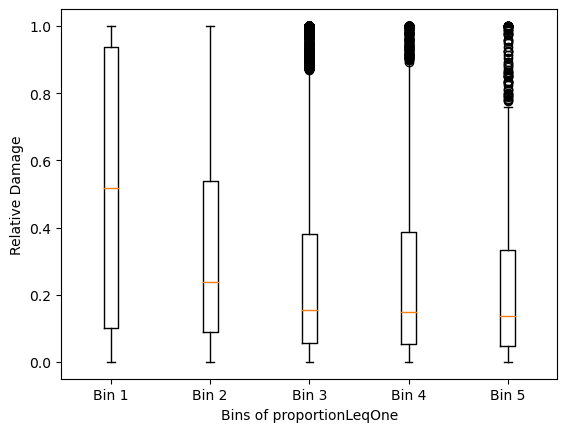

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'proportionLeqOne' and 'relative damage' columns

# Define the number of bins and the bin edges
num_bins = 5
bin_edges = pd.cut(df['proportionLeqOne'], bins=num_bins)

# Group the data by the bins
grouped_data = df.groupby(bin_edges)

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    ax.boxplot(data['relativeDamage'], positions=[i+1])

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels([f'Bin {i+1}' for i in range(num_bins)])

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

# Show the plot
plt.show()


In [31]:
len(df[df['proportionLeqOne'] >= .8])

1080

In [32]:
len(df_only_anomalies[df_only_anomalies['proportionLeqOne'] >= .8])

628

In [33]:
len(df_no_anomalies[df_no_anomalies['proportionLeqOne'] >= .8])

452

In [34]:
len(df[df['proportionLeqOne'] <= .2])

16083

In [35]:
len(df_only_anomalies[df_only_anomalies['proportionLeqOne'] <= .2])

672

In [36]:
len(df_no_anomalies[df_no_anomalies['proportionLeqOne'] <= .2])

15411

In [37]:
len(df_only_anomalies[(df_only_anomalies['proportionLeqOne'] >= .2) & (df_only_anomalies['proportionLeqOne'] <= .4)])

686

In [38]:
len(df_no_anomalies[(df_no_anomalies['proportionLeqOne'] >= .2) & (df_no_anomalies['proportionLeqOne'] <= .4)])

6473

In [39]:
len(df_only_anomalies[(df_only_anomalies['proportionLeqOne'] >= .4) & (df_only_anomalies['proportionLeqOne'] <= .6)])

919

In [40]:
len(df_no_anomalies[(df_no_anomalies['proportionLeqOne'] >= .4) & (df_no_anomalies['proportionLeqOne'] <= .6)])

6388

In [41]:
len(df_only_anomalies[(df_only_anomalies['proportionLeqOne'] >= .6) & (df_only_anomalies['proportionLeqOne'] <= .8)])

700

In [42]:
len(df_no_anomalies[(df_no_anomalies['proportionLeqOne'] >= .6) & (df_no_anomalies['proportionLeqOne'] <= .8)])

2968

In [43]:
df['proportionLeqOne'].mean()

0.27987520313638553

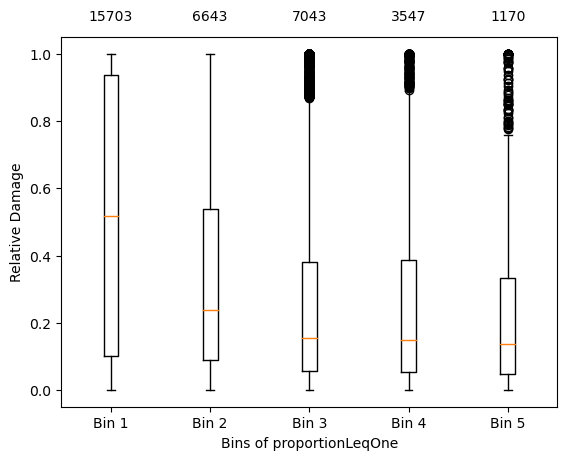

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'proportionLeqOne' and 'relative damage' columns

# Define the number of bins and the bin edges
num_bins = 5
bin_edges = pd.cut(df['proportionLeqOne'], bins=num_bins)

# Group the data by the bins
grouped_data = df.groupby(bin_edges)

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i + 1)
    ax.boxplot(data['relativeDamage'], positions=[i + 1])
    # Add the number of observations in each bin as text on the plot
    ax.text(i + 1, data['relativeDamage'].max() + 0.1, len(data), ha='center')

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels([f'Bin {i + 1}' for i in range(num_bins)])

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')

plt.title('')

# Show the plot
plt.show()


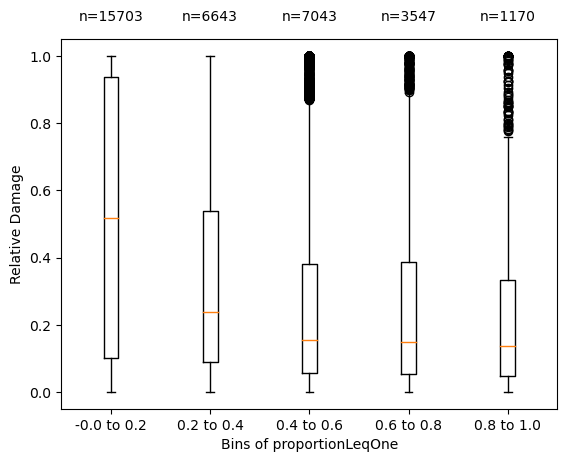

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the number of bins and the bin edges
num_bins = 5
bin_edges = pd.cut(df['proportionLeqOne'], bins=num_bins)

# Group the data by the bins
grouped_data = df.groupby(bin_edges)

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')


# Show the plot
plt.show()



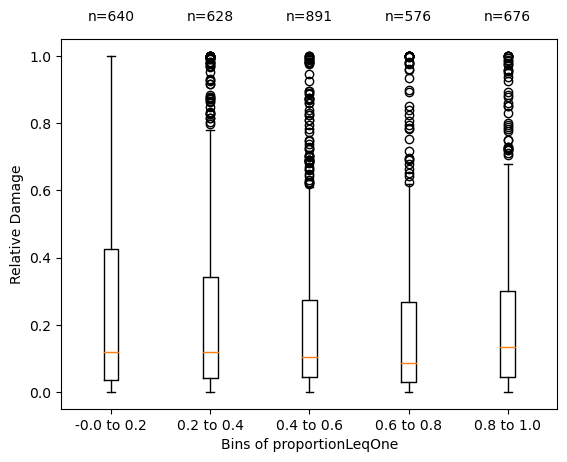

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the number of bins and the bin edges
num_bins = 5
bin_edges = pd.cut(df_only_anomalies['proportionLeqOne'], bins=num_bins)

# Group the data by the bins
grouped_data = df_only_anomalies.groupby(bin_edges)

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')


# Show the plot
plt.show()



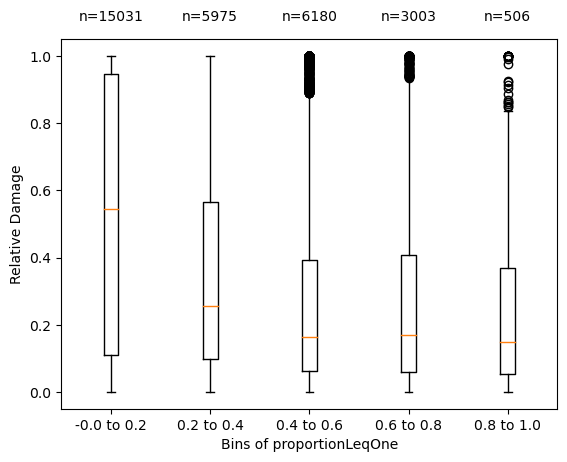

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the number of bins and the bin edges
num_bins = 5
bin_edges = pd.cut(df_no_anomalies['proportionLeqOne'], bins=num_bins)

# Group the data by the bins
grouped_data = df_no_anomalies.groupby(bin_edges)

# Create a figure and axis for the boxplots
fig, ax = plt.subplots()

# Create a list to store the positions of each boxplot
positions = []

# Store the labels for the bins
bin_labels = []

# Iterate over the groups and create boxplots
for i, (group, data) in enumerate(grouped_data):
    positions.append(i+1)
    # count the number of observations in the bin
    num_observations = len(data)
    # create the label for the bin
    bin_label = f'{group.left:.1f} to {group.right:.1f}'
    bin_labels.append(bin_label)
    ax.boxplot(data['relativeDamage'], positions=[i+1])
    
    # Annotate number of observations at the very top of the figure
    ax.text(i+1, 1.05, f'n={num_observations}', ha='center', transform=ax.get_xaxis_transform())

# Set the x-axis labels
ax.set_xticks(positions)
ax.set_xticklabels(bin_labels)

# Set the x-axis label
ax.set_xlabel('Bins of proportionLeqOne')

# Set the y-axis label
ax.set_ylabel('Relative Damage')


# Show the plot
plt.show()

In [48]:
df_diff = pd.read_parquet('waterDepth_diff3.parquet.gzip')

In [49]:
merged_df = df_diff.merge(df_only_anomalies, on='id', how='inner')


In [50]:
len(merged_df)

2147

In [51]:
len(df_only_anomalies)

3411

In [52]:
2159/3411

0.6329522134271475

In [53]:
len(df_only_anomalies[((df_only_anomalies['waterDepth'] - df_only_anomalies['medWaterDepth']) > 3)])


2159

In [54]:
df_only_anomalies['medWaterDepth']

33       3.0
46       1.0
53       1.0
59       3.0
64       2.0
        ... 
34367    1.0
34371    9.0
34374    6.0
34376    7.5
34377    1.0
Name: medWaterDepth, Length: 3411, dtype: float64

In [55]:
df_only_anomalies['waterDepth']

33       6.0
46       6.0
53       6.0
59       6.0
64       6.0
        ... 
34367    6.0
34371    6.0
34374    6.0
34376    6.0
34377    6.0
Name: waterDepth, Length: 3411, dtype: float64

In [56]:
len((df[((df['waterDepth'] - df['medWaterDepth']) > 3)]))


12244

In [57]:
len(df)

34106

In [58]:
12244/34106

0.35899841670087373

In [59]:
len(df_only_anomalies[df_only_anomalies['buildingPropertyValue'] <= 750000])

3223

In [60]:
df_only_anomalies[df_only_anomalies['buildingPropertyValue'] <= 750000]['relativeDamage'].mean()


0.2254406458256327

In [61]:
len(df_only_anomalies)

3411

In [62]:
df_only_anomalies[df_only_anomalies['buildingPropertyValue'] <= 1000000]['buildingPropertyValue'].mean()


180910.7304400978

In [63]:
df_only_anomalies[df_only_anomalies['buildingPropertyValue'] <= 1000000]['relativeDamage'].mean()


0.22417492944351927

In [64]:
df_only_anomalies[df_only_anomalies['buildingPropertyValue'] <= 100000]['relativeDamage'].mean()


0.2763874114122471

In [65]:
len(df_only_anomalies[df_only_anomalies['buildingPropertyValue'] <= 100000]['relativeDamage'])

1051

In [66]:
len(df_only_anomalies)

3411

In [67]:
df[df['buildingPropertyValue'] <=100000]['relativeDamage'].mean()

0.4112334982205424

In [68]:
df_only_anomalies.head()

,agricultureStructureIndicator,asOfDate,basementEnclosureCrawlspaceType,policyCount,crsClassificationCode,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,baseFloodElevation,ratedFloodZone,houseWorship,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,primaryResidenceIndicator,buildingDamageAmount,buildingDeductibleCode,netBuildingPaymentAmount,buildingPropertyValue,causeOfDamage,condominiumCoverageTypeCode,contentsDamageAmount,contentsDeductibleCode,netContentsPaymentAmount,contentsPropertyValue,disasterAssistanceCoverageRequired,eventDesignationNumber,ficoNumber,floodCharacteristicsIndicator,floodWaterDuration,floodproofedIndicator,floodEvent,iccCoverage,netIccPaymentAmount,nfipRatedCommunityNumber,nfipCommunityNumberCurrent,nfipCommunityName,nonPaymentReasonContents,nonPaymentReasonBuilding,numberOfUnits,buildingReplacementCost,contentsReplacementCost,replacementCostBasis,stateOwnedIndicator,waterDepth,floodZoneCurrent,buildingDescriptionCode,rentalPropertyIndicator,state,reportedCity,reportedZipCode,countyCode,censusTract,censusBlockGroupFips,latitude,longitude,id,proportionLeqOne,proportionLeqTwo,proportionLeqThree,proportionLeqFour,proportionLeqFive,proportionLeqSix,medWaterDepth,p25WaterDepth,p75WaterDepth,p90WaterDepth,diffMedWaterDepth,diff90WaterDepth,relativeDamage,originalConstructionDate_year,AgeofBuilding,AgeofBuildinguntilflood,bool95,bool90,bool80,bool75,bool50,elevationDifference_category
33,0,2020-01-22T16:55:53.194Z,2.0,1,NaN,2008-09-12 00:00:00+00:00,1,NaN,-7.0,12.0,AE,0,NaN,4.7,4.8,3.0,0,60.0,1.0,1980-01-01 00:00:00+00:00,2003-01-01T00:00:00.000Z,12235.79,1382.57,0.0,1,2,0,250000.0,100000.0,2008,0,12736.0,0,12235.79,186989.0,1,N,1883.0,0,1382.57,0.0,0.0,NaN,668.0,NaN,0.0,0,Hurricane Ike,30000.0,0.0,485469.0,NaN,"GALVESTON, CITY OF",NaN,NaN,1.0,196830.0,0.0,A,0,6.0,NaN,NaN,0,TX,Currently Unavailable,77554.0,48167.0,4.816773e+10,4.816773e+11,29.1,-95.1,cebac00a-f81d-47d8-a6c2-4478588812fd,0.385350,0.423567,0.464968,0.554140,0.614650,0.694268,3.0,0.0,7.0,34.1,3.0,-28.1,0.068111,1980.0,43.0,28.0,False,False,False,False,False,Category 2
46,0,2020-01-22T16:55:53.194Z,1.0,1,6.0,2011-08-27 00:00:00+00:00,1,NaN,-3.0,8.0,AE,0,NaN,4.5,4.9,3.0,0,50.0,1.0,1988-01-01 00:00:00+00:00,1999-12-06T00:00:00.000Z,4334.27,0.00,0.0,1,2,0,250000.0,0.0,2011,1,4898.0,1,4334.27,219010.0,1,N,NaN,0,0.00,NaN,0.0,NaN,276.0,NaN,0.0,0,Hurricane Irene,30000.0,0.0,370430.0,370430.0,"SOUTHERN SHORES, TOWN OF",NaN,NaN,1.0,370103.0,NaN,R,0,6.0,AE,1.0,0,NC,Currently Unavailable,27949.0,37055.0,3.705597e+10,3.705597e+11,36.1,-75.7,6776d584-2496-4c35-bb32-fe168a93d6a2,0.650794,0.809524,0.857143,0.888889,0.888889,0.896825,1.0,0.0,2.0,3.2,5.0,2.8,0.022364,1988.0,35.0,23.0,False,False,False,False,True,Category 4
53,0,2020-01-22T16:55:53.194Z,NaN,1,7.0,2011-08-27 00:00:00+00:00,1,NaN,-5.0,8.0,A04,0,7.0,3.3,3.3,2.0,0,50.0,1.0,1978-07-01 00:00:00+00:00,1986-10-31T00:00:00.000Z,7310.99,0.00,0.0,1,2,0,250000.0,37800.0,2011,0,8311.0,1,7310.99,106011.0,1,N,NaN,1,0.00,NaN,0.0,NaN,276.0,NaN,0.0,0,Hurricane Irene,30000.0,0.0,375353.0,375353.0,"KILL DEVIL HILLS, TOWN OF",97.0,NaN,0.0,246072.0,NaN,A,0,6.0,AE,1.0,0,NC,Currently Unavailable,27948.0,37055.0,3.705597e+10,3.705597e+11,36.0,-75.7,555b23b6-7cba-4a0b-a239-19a36d274e0e,0.565217,0.630435,0.782609,0.847826,0.869565,0.891304,1.0,1.0,3.0,6.6,5.0,-0.6,0.078398,1978.0,45.0,33.0,False,False,False,False,True,Category 3
59,0,2020-01-22T16:55:53.194Z,2.0,1,NaN,2008-09-13 00:00:00+00:00,1,NaN,-11.0,15.0,VE,0,NaN,5.4,4.2,3.0,0,50.0,1.0,2002-01-01 00:00:00+00:00,2007-05-14T00:00:00.000Z,7361.00,0.00,0.0,1,2,0,25

In [69]:
df_only_anomalies.to_csv('IsolationForestAnomalies.csv', index=False)
